### 뉴스 분류 예측 프로그램
1. 뉴스 크롤링 및 라벨링
2. one_hot_encoding, embeded
3. 학습
4. 테스트
5. 실행

##### 기사 분석이 너무 오래 걸려서 제목으로 우회

### train data

In [1]:
from konlpy.tag import Okt
import csv
from keras.preprocessing.text import Tokenizer

okt = Okt()

file_news = open('Article_shuffled.csv', 'r')
news_line = csv.reader(file_news)

In [2]:
total_news = []

categorical = []
titles = []

for i in news_line:
    categorical.append(i[0])
    titles.append(i[1])
    
total_news.append(categorical)
total_news.append(titles)

In [3]:
import pandas as pd

df = pd.DataFrame(total_news)

In [4]:
df = df.T

In [5]:
df.columns = ["label","data"]
news_df = df.copy()

In [6]:
news_df

,label,data
0,economy,환경단체 해양생태계 망치는 수산보조금 지급 반대
1,IT과학,비트코인 4000만원대서 횡보…이더리움 5% 상승
2,IT과학,러쉬코인 재단 드래곤플라이 차기작 게임에 지분 투자 단행
3,IT과학,팝스타 케이티 페리 NFT 발행한다
4,economy,SK이노 배터리사업 연내 분사 가시화…IPO도 추진
...,...,...
5655,economy,롯데 하반기 VCM ESG 경영 선포
5656,economy,바로고 라이더와 음식점주 신용·금융 관리 돕는다
5657,economy,볼보 차세대 순수 전기차 비전 볼보 콘셉트 리차지 공개
5658,economy,기아 6월 총 25만3592대 판매...전년대비 20% 증가


In [7]:
for n, i in enumerate(news_df["data"]):
    news_df["data"][n] = okt.pos(i, norm=True, stem=True)

In [8]:
news_df1 = news_df
news_df1

,label,data
0,economy,"[(환경, Noun), (단체, Noun), (해양, Noun), (생태계, Nou..."
1,IT과학,"[(비트코인, Noun), (4000만원, Number), (대서, Foreign)..."
2,IT과학,"[(러쉬, Noun), (코인, Noun), (재단, Noun), (드래곤플라이, ..."
3,IT과학,"[(팝스타, Noun), (케이티, Noun), (페리, Noun), (NFT, A..."
4,economy,"[(SK, Alpha), (이노, Noun), (배터리, Noun), (사업, No..."
...,...,...
5655,economy,"[(롯데, Noun), (하반기, Noun), (VCM, Alpha), (ESG, ..."
5656,economy,"[(바로, Noun), (고, Josa), (라이더, Noun), (와, Josa)..."
5657,economy,"[(볼보, Noun), (차세대, Noun), (순수, Noun), (전기차, No..."
5658,economy,"[(기아, Noun), (6월, Number), (총, Noun), (25만, Nu..."


In [9]:
total_modi = []

for i in range(len(news_df1["data"])):
    modi = []
    for j in range(len(news_df1["data"][i])):
        if not news_df1["data"][i][j][1] in ['Josa', 'Eomi', 'Punctuation', "Foreign"]:
            modi.append(news_df1["data"][i][j][0])
    total_modi.append(modi)

In [10]:
aa = pd.DataFrame(total_modi)
aa1 = aa.T[:14]
aa2 = aa1.T
aa2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,환경,단체,해양,생태계,망치다,수산,보조금,지급,반대,None,None,None,None,None
1,비트코인,4000만원,횡보,이,더,리움,5%,상승,None,None,None,None,None,None
2,러쉬,코인,재단,드래곤플라이,차기작,게임,지,분,투자,단행,None,None,None,None
3,팝스타,케이티,페리,NFT,발행,하다,None,None,None,None,None,None,None,None
4,SK,이노,배터리,사업,연내,분사,가시,화,IPO,도,추진,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,롯데,하반기,VCM,ESG,경영,선포,None,None,None,None,None,None,None,None
5656,바로,라이더,음식,점주,신용,금융,관리,돕다,None,None,None,None,None,None
5657,볼보,차세대,순수,전기차,비다,볼보,콘셉트,리차,공개,None,None,None,None,None
5658,기아,6월,총,25만,3592,대다,판매,전,년,대비,20%,증가,None,None


In [11]:
aa2["modi_data"] = ""
for i in range(len(aa2)):
    aa2["modi_data"] = aa2[0].map(str)
    for j in range(14):
        if aa2[j][i] != None:
            aa2["modi_data"] = aa2["modi_data"] + "," + aa2[j].map(str)

In [12]:
aa3 = list(aa2["modi_data"])
data_df = pd.DataFrame(aa3, columns=["data"])
data_df

,data
0,"환경,환경,단체,해양,생태계,망치다,수산,보조금,지급,반대"
1,"비트코인,비트코인,4000만원,횡보,이,더,리움,5%,상승,None"
2,"러쉬,러쉬,코인,재단,드래곤플라이,차기작,게임,지,분,투자"
3,"팝스타,팝스타,케이티,페리,NFT,발행,하다,None,None,None"
4,"SK,SK,이노,배터리,사업,연내,분사,가시,화,IPO"
...,...
5655,"롯데,롯데,하반기,VCM,ESG,경영,선포,None,None,None"
5656,"바로,바로,라이더,음식,점주,신용,금융,관리,돕다,None"
5657,"볼보,볼보,차세대,순수,전기차,비다,볼보,콘셉트,리차,공개"
5658,"기아,기아,6월,총,25만,3592,대다,판매,전,년"


In [13]:
news_df1 = news_df1.drop(["data"], axis=1)
news_df1

,label
0,economy
1,IT과학
2,IT과학
3,IT과학
4,economy
...,...
5655,economy
5656,economy
5657,economy
5658,economy


In [14]:
news_df1 = pd.concat([news_df1,data_df], axis=1)

In [15]:
train_data = news_df1

In [16]:
train_data["label"]

0       economy
1          IT과학
2          IT과학
3          IT과학
4       economy
         ...   
5655    economy
5656    economy
5657    economy
5658    economy
5659    economy
Name: label, Length: 5660, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(train_data["label"])
labels = encoder.transform(train_data["label"])
y_train = labels

In [18]:
y_train

array([1, 0, 0, ..., 1, 1, 1])

In [19]:
tokenizer = Tokenizer(num_words=1000)

# 단어 인덱스를 구축
tokenizer.fit_on_texts(train_data["data"])

# print("index_word :" , tokenizer.index_word )
# print("word_index :" , tokenizer.word_index )
# print("단어 출현 빈도수 : " , tokenizer.index_docs )
# print("문장 수 : " , tokenizer.document_count) #문장 수

# 문자열을 정수 인덱스의 리스트로 변환
sequences = tokenizer.texts_to_sequences(train_data["data"])
# print("sequences",  sequences  )

# 원-핫 이진 벡터 표현
one_hot_results = tokenizer.texts_to_matrix(train_data["data"], mode="binary")
# print( "one_hot_results", one_hot_results  )


### test data

In [20]:
if '\0' in open('Article_shuffled_test.csv').read():
    print("you have null value in your file")
else:
    print("you don't")

you have null value in your file


In [21]:
test_news = open('Article_shuffled_test.csv', 'r')

test_line = csv.reader(x.replace('\0', '') for x in test_news)

In [22]:
test_tot_news = []

t_categorical = []
t_titles = []

for i in test_line:
    t_categorical.append(i[0])
    t_titles.append(i[1])
    
test_tot_news.append(t_categorical)
test_tot_news.append(t_titles)

In [23]:
test_df = pd.DataFrame(test_tot_news)

In [24]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,670,671,672,673,674,675,676,677,678,679
0,economy,economy,IT과학,IT과학,economy,IT과학,IT과학,IT과학,IT과학,economy,...,IT과학,economy,IT과학,IT과학,economy,IT과학,economy,IT과학,IT과학,IT과학
1,정승일 한전사장 에너지 전분야 기술혁신,삼성 AI 시스템에어컨 실외기… 실내기 최대 64대까지 연결,삼성도 20년 만에 재 진출…판 커진 창문형 에어컨 시장,의협 복지부와 ‘코로나19 백신접종 의정협의체 구성’,시중은행 대출 2017년 2월 이후 첫 감소… 청약 자금 유입 일시적 현상,“진작 이렇게 팔렸으면…” 몸값 낮춘 ‘LG폰’ 마지막 불꽃,“카톡 안에 배달 주문 생긴대” 사장님 홀린 정보 알고보니…,이윤식 NHN고도 대표 변화된 세상의 Z커머스 주목해야,KINX “클라우드허브 2년 새 신규 고객 118% 증가했다”,탄소중립 법제화 필요…연합인포맥스 콘퍼런스,...,아예 디지털기획원DPB 신설하자,가리봉시장 방치 부지에 청년주택 짓는다,인공지능 반도체 기술 살피는 임혜숙 과기정통부 장관,KT 학력 제한 없는 경기도미래기술학교 프로젝트 참여,한난 백신 유급휴가 도입…코로나 접종 활성화 앞장,위상 높아지는 토종 앱마켓… MS·도이치텔레콤 투자 따냈다,미래산업 육성을 위해 연결성 있는 정책·산업간 융복합 필요,동신대 지역 미래를 여는 과학기술 프로젝트 사업 선정,모멘트 발사대에 선 누리호 인증모델,경기생활문화센터 홈페이지


In [25]:
test_df = test_df.T

In [26]:
test_df.columns = ["label","data"]
test_news_df = test_df.copy()

In [27]:
for n, i in enumerate(test_news_df["data"]):
    test_news_df["data"][n] = okt.pos(i, norm=True, stem=True)

In [28]:
test_news_df1 = test_news_df
test_news_df1

,label,data
0,economy,"[(정승일, Noun), (한전, Noun), (사장, Noun), (에너지, No..."
1,economy,"[(삼성, Noun), (AI, Alpha), (시스템, Noun), (에어컨, N..."
2,IT과학,"[(삼성, Noun), (도, Josa), (20년, Number), (만에, Jo..."
3,IT과학,"[(의협, Noun), (복지부, Noun), (와, Josa), (‘, Forei..."
4,economy,"[(시중, Noun), (은행, Noun), (대출, Noun), (2017년, N..."
...,...,...
675,IT과학,"[(위상, Noun), (높아지다, Verb), (토종, Noun), (앱, Nou..."
676,economy,"[(미래, Noun), (산업, Noun), (육성, Noun), (을, Josa)..."
677,IT과학,"[(동신대, Noun), (지역, Noun), (미래, Noun), (를, Josa..."
678,IT과학,"[(모멘트, Noun), (발사, Noun), (대, Suffix), (에, Jos..."


In [29]:
test_modi = []

for i in range(len(test_news_df1["data"])):
    t_modi = []
    for j in range(len(test_news_df1["data"][i])):
        if not test_news_df1["data"][i][j][1] in ['Josa', 'Eomi', 'Punctuation', "Foreign"]:
            t_modi.append(test_news_df1["data"][i][j][0])
    test_modi.append(t_modi)

In [30]:
bb = pd.DataFrame(test_modi)
bb1 = bb.T[:14]
bb2 = bb1.T
bb2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,정승일,한전,사장,에너지,전분,기술,혁신,None,None,None,None,None,None,None
1,삼성,AI,시스템,에어컨,실외,기,실,내기,최대,64,대다,연결,None,None
2,삼성,20년,재,진출,판,커지다,창문,형,에어컨,시장,None,None,None,None
3,의협,복지부,코로나,19,백신,접종,의정,협의,체,구성,None,None,None,None
4,시중,은행,대출,2017년,2월,이후,첫,감소,청약,자금,유입,일시,적,현상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,위상,높아지다,토종,앱,마켓,MS,도이치,텔레콤,투자,따내다,None,None,None,None
676,미래,산업,육성,위해,연결,성,있다,정책,산업,간,융,복합,필요,None
677,동신대,지역,미래,여,과학기술,프로젝트,사업,선정,None,None,None,None,None,None
678,모멘트,발사,대,선,누리,호,인증,모델,None,None,None,None,None,None


In [31]:
bb2["modi_data"] = ""
for i in range(len(bb2)):
    bb2["modi_data"] = bb2[0].map(str)
    for j in range(14):
        if bb2[j][i] != None:
            bb2["modi_data"] = bb2["modi_data"] + "," + bb2[j].map(str)

In [32]:
bb3 = list(bb2["modi_data"])
test_data_df = pd.DataFrame(bb3, columns=["data"])
test_data_df

,data
0,"정승일,정승일,한전,사장,에너지"
1,"삼성,삼성,AI,시스템,에어컨"
2,"삼성,삼성,20년,재,진출"
3,"의협,의협,복지부,코로나,19"
4,"시중,시중,은행,대출,2017년"
...,...
675,"위상,위상,높아지다,토종,앱"
676,"미래,미래,산업,육성,위해"
677,"동신대,동신대,지역,미래,여"
678,"모멘트,모멘트,발사,대,선"


In [33]:
test_news_df1 = test_news_df1.drop(["data"], axis=1)
test_news_df1

,label
0,economy
1,economy
2,IT과학
3,IT과학
4,economy
...,...
675,IT과학
676,economy
677,IT과학
678,IT과학


In [34]:
test_news_df1 = pd.concat([test_news_df1,test_data_df], axis=1)

In [35]:
test_data = test_news_df1

In [94]:
# 라벨링
encoder.fit(test_data["label"])
t_labels = encoder.transform(test_data["label"])
y_test = t_labels

In [37]:
tokenizer.fit_on_texts(test_data["data"])

t_sequences = tokenizer.texts_to_sequences(test_data["data"])

t_one_hot_results = tokenizer.texts_to_matrix(test_data["data"], mode="binary")

In [38]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
####### 데이터 준비 
from tensorflow.keras.layers import Embedding
from tensorflow.keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 20  # 사용할 텍스트의 길이(가장 빈번한 20 개의 단어만 사용합니다)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환.
x_train = preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen) # 가장 빈번한 단어 최대 maxlen(20)개만
x_test = preprocessing.sequence.pad_sequences(t_sequences, maxlen=maxlen)
print(x_train.shape)

(5660, 20)


In [40]:
print(x_test.shape)

(680, 20)


### 모델 생성

In [41]:
####### 모델 생성

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

# 가능한 토큰의 개수(1,0000)와 임베딩 차원(8)로 설정 
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됨

model.add(Flatten())  #(samples, maxlen * 8) 크기의 2D 텐서로 펼침

In [42]:
# 분류기를 추가
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


### 학습

In [43]:
####### 학습

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.3)

Epoch 1/10
124/124 [==============================] - 14s 7ms/step - loss: 0.6900 - acc: 0.5428 - val_loss: 0.6742 - val_acc: 0.5962
Epoch 2/10
124/124 [==============================] - 0s 1ms/step - loss: 0.6599 - acc: 0.6484 - val_loss: 0.6356 - val_acc: 0.7387
Epoch 3/10
124/124 [==============================] - 0s 1ms/step - loss: 0.6047 - acc: 0.8008 - val_loss: 0.5788 - val_acc: 0.7587
Epoch 4/10
124/124 [==============================] - 0s 1ms/step - loss: 0.5358 - acc: 0.8122 - val_loss: 0.5259 - val_acc: 0.7657
Epoch 5/10
124/124 [==============================] - 0s 1ms/step - loss: 0.4717 - acc: 0.8192 - val_loss: 0.4853 - val_acc: 0.7728
Epoch 6/10
124/124 [==============================] - 0s 1ms/step - loss: 0.4313 - acc: 0.8223 - val_loss: 0.4610 - val_acc: 0.7775
Epoch 7/10
124/124 [==============================] - 0s 1ms/step - loss: 0.4003 - acc: 0.8401 - val_loss: 0.4490 - val_acc: 0.7828
Epoch 8/10
124/124 [==============================] - 0s 1ms/step - loss: 0

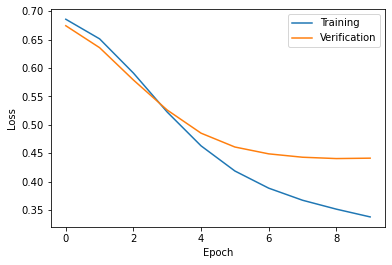

In [44]:
import matplotlib.pyplot as plt

history = history.history
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Verification'], loc=0)
plt.show()

### 테스트

In [50]:
result = model.predict(x_test,batch_size=32)
for i in result:
    if i > 0.5:
        print("IT과학")
    else:
        print("경제")

경제
경제
경제
IT과학
IT과학
IT과학
IT과학
경제
IT과학
경제
경제
IT과학
IT과학
IT과학
IT과학
경제
IT과학
IT과학
경제
IT과학
경제
경제
IT과학
경제
IT과학
경제
경제
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
IT과학
경제
IT과학
경제
IT과학
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
경제
IT과학
경제
IT과학
IT과학
IT과학
IT과학
경제
경제
경제
IT과학
IT과학
경제
경제
경제
경제
IT과학
경제
경제
경제
경제
IT과학
IT과학
IT과학
경제
IT과학
경제
IT과학
경제
경제
IT과학
IT과학
IT과학
경제
경제
IT과학
IT과학
경제
IT과학
IT과학
경제
IT과학
IT과학
IT과학
IT과학
경제
경제
IT과학
경제
IT과학
IT과학
IT과학
IT과학
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
경제
IT과학
IT과학
경제
경제
경제
경제
IT과학
경제
IT과학
경제
경제
경제
IT과학
경제
경제
IT과학
경제
IT과학
IT과학
경제
IT과학
경제
IT과학
IT과학
IT과학
IT과학
IT과학
경제
IT과학
경제
경제
IT과학
IT과학
IT과학
경제
경제
IT과학
경제
IT과학
IT과학
IT과학
IT과학
IT과학
경제
경제
IT과학
경제
IT과학
경제
경제
IT과학
IT과학
IT과학
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
경제
경제
IT과학
경제
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
IT과학
IT과학
경제
경제
경제
IT과학
경제
IT과학
IT과학
IT과학
IT과학
경제
경제
경제
경제
경제
IT과학
IT과학
IT과학
경제
경제
경제
IT과학
경제
경제
IT과학
IT과학
IT과학
IT과학
IT과학
IT과학
경제
경제
경제
경제
IT과학
경제
IT과학
경제
경제
경제
IT과학
IT과학
IT과학
IT과학
경제
IT과학
IT과학
IT과학
경제
IT과학
IT과학
경

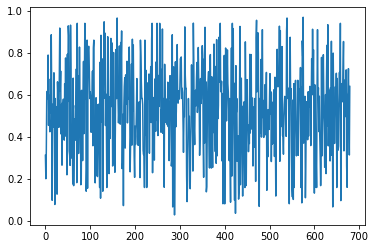

In [46]:
plt.plot(result)
plt.show()

### 실행

In [69]:
ex_df = pd.read_csv("ex_news.csv")

In [70]:
ex_df.columns = ["label","data"]
ex_df

,label,data
0,economy,3700만 원대 못 넘기나…비트코인 등락 '박스권'


In [91]:
ex_df["data"][0] = okt.nouns(ex_df["data"][0])

In [96]:
tokenizer.fit_on_texts(ex_df["data"])

ex_sequences = tokenizer.texts_to_sequences(ex_df["data"])

ex_one_hot_results = tokenizer.texts_to_matrix(ex_df["data"], mode="binary")

In [97]:
ex_test = preprocessing.sequence.pad_sequences(ex_sequences, maxlen=maxlen)

In [98]:
result = model.predict(ex_test,batch_size=32)

if result > 0.5:
    print("IT과학")
else:
    print("경제")

경제
